<a href="https://colab.research.google.com/github/DamodaraBarbosa/eleicoes_ceara_2022/blob/main/05_seg_turno_presidente_eleicoes_ceara_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação das bibliotecas `geopandas`, `geobr` e `descartes`

In [12]:
!pip install geopandas geobr descartes

Importando as bibliotecas

In [13]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geobr import read_municipality
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [14]:
# Para ignorar qualquer aviso:

import warnings

warnings.filterwarnings("ignore")

# 1. Carregamento dos dados no *dataframe*

In [15]:
# Os dados da eleição presidencial são carregados:

presidente = pd.read_csv(
    '/content/drive/MyDrive/eleicoes_ceara_2022/votacao_secao_2022_BR_tratado.csv',
    encoding='latin-1', sep=','
)

# Selecionam-se apenas os dados do 2º turno:

presidente = presidente.query('nr_turno == 2')
presidente.head(2)

,nm_municipio,nr_turno,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
155,PACATUBA,2,57,270,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,175
156,CRATEÚS,2,20,209,PRESIDENTE,13,LUIZ INÁCIO LULA DA SILVA,200


# 2. Informações do *dataframe*

## 2.1. Dimensões do *dataframe*

In [16]:
presidente.shape

(88629, 8)

## 2.2 Infos do *dataframe*

In [17]:
presidente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88629 entries, 155 to 242820
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   nm_municipio  88629 non-null  object
 1   nr_turno      88629 non-null  int64 
 2   nr_zona       88629 non-null  int64 
 3   nr_secao      88629 non-null  int64 
 4   ds_cargo      88629 non-null  object
 5   nr_votavel    88629 non-null  int64 
 6   nm_votavel    88629 non-null  object
 7   qt_votos      88629 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


## 2.3. Dados faltantes

In [18]:
presidente.isna().sum()

nm_municipio    0
nr_turno        0
nr_zona         0
nr_secao        0
ds_cargo        0
nr_votavel      0
nm_votavel      0
qt_votos        0
dtype: int64

> Não há dados faltantes.

## 2.4. Dados duplicados

In [19]:
presidente.loc[presidente.duplicated()]

,nm_municipio,nr_turno,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos


> Não há dados duplicados.

# 3. Análise do 2º turno da eleição para presidente no Ceará

## 3.1. Candidatos

In [20]:
presidente['nm_votavel'].unique()

array(['LUIZ INÁCIO LULA DA SILVA', 'JAIR MESSIAS BOLSONARO', 'VOTO NULO',
       'VOTO BRANCO'], dtype=object)

> Excetuando **voto nulo e voto branco**, que não são candidatos, tivemos **Luiz Inácio Lula da Silva e Jair Messias Bolsonaro.**

## 3.2. Votos por candidato

In [21]:
# Determina-se a quantidade de votos por candidato:

votos_por_candidato = presidente.groupby('nm_votavel')['qt_votos'].sum().sort_values()

In [22]:
fig = px.bar(
    x=votos_por_candidato.values,
    y=votos_por_candidato.keys(),
    color=votos_por_candidato.keys(),
    text=votos_por_candidato.values,
    title='Votos por candidato (2º turno para presidente)'
)
fig.update_layout(title=dict(x=0.5), xaxis_title='Votos', yaxis_title='Candidatos', showlegend=False)
fig.update_traces(textfont_size=12, textposition='outside')
fig.update_xaxes(range=[0, 4.2e6])
fig.show()

> O candidato mais votado no 2º turno para presidente no estado do Ceará foi Luiz Inácio Lula da Silva.

## 3.3. Porcentagem dos votos totais e válidos

In [23]:
# Excetuam-se os votos brancos e nulos:

votos_validos = presidente.query('nm_votavel != ["VOTO NULO", "VOTO BRANCO"]')

# Calcula-se apenas os votos válidos:

total_votos_validos = votos_validos['qt_votos'].sum()
print(f'Votos válidos: {total_votos_validos}')

# Votos totais incluindo brancos e nulos:

total_votos = presidente['qt_votos'].sum()
print(f'Votos totais: {total_votos}')

Votos válidos: 5442368
Votos totais: 5649398


In [24]:
votos_validos['nm_votavel'].unique()

array(['LUIZ INÁCIO LULA DA SILVA', 'JAIR MESSIAS BOLSONARO'],
      dtype=object)

> **VOTO BRANCO e VOTO NULO** foram removidos na variável `votos_validos`.

In [25]:
# Instancia-se um dataframe contendo a porcentagem de votos totais e votos válidos por candidato ao senado:

porcentagem_votos_presidente = pd.DataFrame(
    {'Votos totais': round((presidente.groupby('nm_votavel')['qt_votos'].sum()/total_votos) * 100, 2), # cálculo da porcentagem de votos totais.
     'Votos válidos': round((votos_validos.groupby('nm_votavel')['qt_votos'].sum()/total_votos_validos) * 100, 2)} # cálculo da porcentagem de votos válidos.
).sort_values(['Votos totais', 'Votos válidos'], ascending=[False, False]) # os dados são ordenados em ordem decrescente.

# Utiliza-se o método transpose para inverter index em colunas e vice-versa:

porcentagem_votos_presidente = porcentagem_votos_presidente.transpose()

porcentagem_votos_presidente

nm_votavel,LUIZ INÁCIO LULA DA SILVA,JAIR MESSIAS BOLSONARO,VOTO NULO,VOTO BRANCO
Votos totais,67.40,28.93,2.48,1.19
Votos válidos,69.97,30.03,NaN,NaN


In [26]:
fig = px.bar(
    data_frame=porcentagem_votos_presidente,
    x=porcentagem_votos_presidente.columns,
    y=porcentagem_votos_presidente.index,
    title='Porcentagem dos votos totais e válidos ao cargo de presidente no 2º turno do Ceará'
)
fig.update_layout(title=dict(x=0.5), yaxis=dict(autorange='reversed'), legend_title='Candidatos', xaxis_title='Votos', yaxis_title='')
fig.show()

> * **Candidato Luiz Inácio Lula da Silva 🥇:** 67,4% dos votos totais e 70,0% dos votos válidos.
> * **Candidato Jair Messias Bolsonaro:** 28,9% dos votos totais e 30% dos votos válidos.

## 3.4. Candidato vencedor por município cearense

In [27]:
# Os votos nos cadidatos à presidência são determinados:

votos_candidatos_por_municipio = presidente.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética para os municípios e em ordem decrescente para os votos:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.sort_values(['nm_municipio', 'qt_votos'], ascending=[True, False])

# Seleciona-se apenas o candidato que obteve mais votos em cada município:

vencedores_por_municipio = votos_candidatos_por_municipio.groupby('nm_municipio').head(1)
vencedores_por_municipio.head() # para visualizar o dataframe.

,nm_municipio,nm_votavel,qt_votos
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025
5,ACARAPE,LUIZ INÁCIO LULA DA SILVA,6262
9,ACARAÚ,LUIZ INÁCIO LULA DA SILVA,26113
13,ACOPIARA,LUIZ INÁCIO LULA DA SILVA,25144
17,AIUABA,LUIZ INÁCIO LULA DA SILVA,7398


In [28]:
# Dataframe com dados geoespaciais dos municípios cearenses:

ceara_gpd = read_municipality(code_muni=23, year=2020)

# Um pequeno tratamento é feito para que os nomes dos municípios estejam em caixa alta:

ceara_gpd['name_muni'] = ceara_gpd['name_muni'].str.upper()

ceara_gpd.head() # visualização do dataframe.

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2300101.0,ABAIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ..."
1,2300150.0,ACARAPE,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ..."
2,2300200.0,ACARAÚ,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ..."
3,2300309.0,ACOPIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ..."
4,2300408.0,AIUABA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ..."


In [29]:
# É feita a união dos dados geoespaciais e os dados referentes aos candidatos vencedores em cada município:

vencedores_por_municipio_gpd = pd.merge(
    left=ceara_gpd[['name_muni', 'geometry']], right=vencedores_por_municipio,
    how='left', left_on='name_muni', right_on='nm_municipio'
)
vencedores_por_municipio_gpd = vencedores_por_municipio_gpd.drop('name_muni', axis=1) # a coluna é eliminada visto que possui dados redundantes.

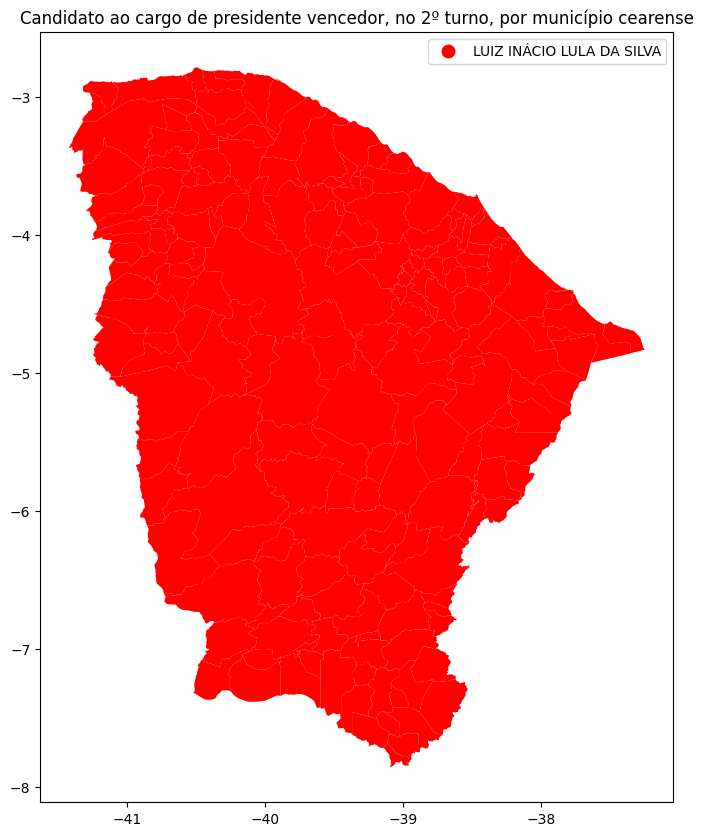

In [30]:
ax = vencedores_por_municipio_gpd.plot(
    'nm_votavel', cmap='autumn', legend=True,
    legend_kwds={'loc': 'upper right'},
    figsize=(12, 10)
)
ax.set_title('Candidato ao cargo de presidente vencedor, no 2º turno, por município cearense')
plt.show()

> O candidato eleito **Luiz Inácio Lula da Silva** foi o **mais votado em todos os municípios cearenses** no 2º turno.

## 3.5. Votos para presidência nos municípios da Região Metropolitana de Fortaleza

A Região Metropolitana de Fortaleza é constituída de 19 municípios sendo eles:

> Aquiraz, Cascavel, Caucaia, Chorozinho, Eusébio, Fortaleza, Guaiúba, Horizonte, Itaitinga, Maracanaú, Maranguape, Pacajus, Pacatuba, Pindoretama, São Gonçalo do Amarante, São Luís do Curu, Paraipaba, Paracuru e Trairi.

Fonte: https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Fortaleza


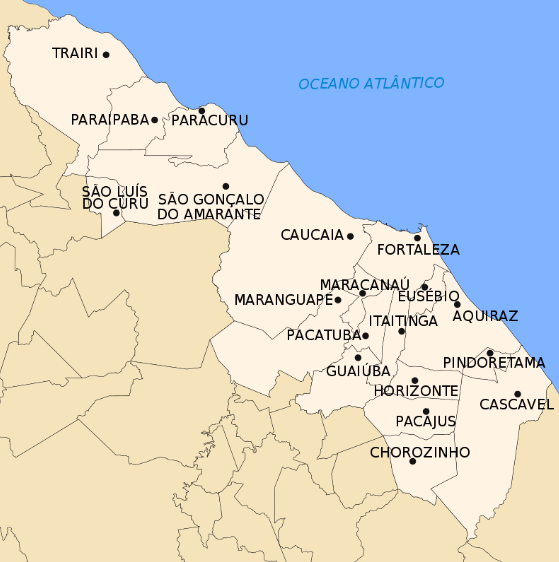

In [31]:
# Municípios da Região Metropolitana de Fortaleza:

regiao_metropolitana = [
    'AQUIRAZ', 'CASCAVEL', 'CAUCAIA', 'CHOROZINHO', 'EUSÉBIO',
    'FORTALEZA', 'GUAIÚBA', 'HORIZONTE', 'ITAITINGA', 'MARACANAÚ',
    'MARANGUAPE', 'PACAJUS', 'PACATUBA', 'PINDORETAMA',
    'SÃO GONÇALO DO AMARANTE', 'SÃO LUÍS DO CURU',
    'PARAIPABA', 'PARACURU', 'TRAIRI'
]

In [32]:
# Buscam-se no conjunto de dados à presidência apenas os municípios da Região Metropolitana de Fortaleza:

presidente_regiao_metropolitana = presidente.query('nm_municipio in @regiao_metropolitana')

# Agrupam-se os dados por município e candidato para determinar os votos:

vencedores_regiao_metropolitana = presidente_regiao_metropolitana.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética e em ordem decrescente do número de votos:

vencedores_regiao_metropolitana = vencedores_regiao_metropolitana.sort_values(['nm_municipio', 'qt_votos'], ascending=[True, False])

vencedores_regiao_metropolitana.head()

,nm_municipio,nm_votavel,qt_votos
1,AQUIRAZ,LUIZ INÁCIO LULA DA SILVA,33374
0,AQUIRAZ,JAIR MESSIAS BOLSONARO,17580
3,AQUIRAZ,VOTO NULO,1130
2,AQUIRAZ,VOTO BRANCO,634
5,CASCAVEL,LUIZ INÁCIO LULA DA SILVA,31901


In [33]:
# Instancia-se um dicionário contendo o nº de votos totais ao cargo de senador por município da Região Metropolitana de Fortaleza:

votos_regiao_metropolitana = presidente.groupby('nm_municipio')['qt_votos'].sum()
votos_regiao_metropolitana = dict(votos_regiao_metropolitana)

In [34]:
# Cálculo da porcentagem de votos que cada candidato ao senado obteve em cada município da Região Metropolitana de Fortaleza:
# Para isso define-se uma função para o cálculo.

def porcentagem_votos(dataframe: pd.DataFrame, dictionary: dict):

  percentual_de_votos = list()

  for index, row in dataframe.iterrows(): # itera-se o dataframe para obter cada linha dele.
    porcentagem = round((row['qt_votos']/dictionary[row['nm_municipio']]) * 100, 2) # os votos são divididos pelo total de votos por município.
    percentual_de_votos.append(porcentagem) # o valor calculado é adicionado a lista.

  return percentual_de_votos

In [35]:
# A coluna com porcentagem de votos é adicionada ao dataframe:

porcentagens = porcentagem_votos(vencedores_regiao_metropolitana, votos_regiao_metropolitana) # porcentagens armazena as porcentagens de votos.
vencedores_regiao_metropolitana['porcentagem'] = porcentagens # criação da nova coluna no dataframe.

In [36]:
vencedores_regiao_metropolitana.head()

,nm_municipio,nm_votavel,qt_votos,porcentagem
1,AQUIRAZ,LUIZ INÁCIO LULA DA SILVA,33374,63.31
0,AQUIRAZ,JAIR MESSIAS BOLSONARO,17580,33.35
3,AQUIRAZ,VOTO NULO,1130,2.14
2,AQUIRAZ,VOTO BRANCO,634,1.20
5,CASCAVEL,LUIZ INÁCIO LULA DA SILVA,31901,65.86


In [37]:
fig = px.bar(
    data_frame=vencedores_regiao_metropolitana, y='nm_municipio', x='porcentagem', color='nm_votavel',
    title='Porcentagem dos votos nos candidados à presidência por município da Região Metropolitana de Fortaleza'
)
fig.update_layout(
    title=dict(x=0.5), yaxis=dict(autorange='reversed'), yaxis_title='Municípios',
    xaxis_title='Porcentagem dos votos', legend_title='Candidatos'
)
fig.show()

> * Os votos no candidato eleito **Luiz Inácio Lula da Silva** variam entre 50% e 70% nos municípios da Região Metropolitana de Fortaleza.
> * Fortaleza e Eusébio foram os municípios da Grande Fortaleza onde o candidato **Jair Messias Bolsonaro** teve mais votos.


## 3.6. Comparação dos votos com os indicadores do IBGE

In [38]:
dados_ibge = pd.read_csv('/content/drive/MyDrive/Datasets/resumo_dados_ibge_ce.csv', encoding='latin-1')
dados_ibge.head()

,nome,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ACARAPE,130.002,15140,0.606,10317.47,2.28,1.75,116.46
2,ACARAÚ,842.471,63556,0.601,13261.89,16.33,1.94,75.44
3,ACOPIARA,2254.279,54687,0.595,9432.25,5.46,0.24,24.26
4,AIUABA,2438.563,17584,0.569,8642.90,2.07,0.08,7.21


Visto que o candidato eleito Luiz Inácio Lula da Silva saiu como o mais votado em todos os municípios cearenses, não faz sentido comparar o mapa com os candidatos vencedores por município do Ceará. Portanto, as análises serão feitas comparando o mapa com o percentual de votos do candidato vencedor com os indicadores socioeconômicos do IBGE.

In [39]:
# Os votos no candidato eleito Lula da Silva por município cearense são obtidos:

votos_lula_por_municipio = presidente.query('nm_votavel == "LUIZ INÁCIO LULA DA SILVA"')\
                                     .groupby('nm_municipio')['qt_votos'].sum().reset_index()

votos_lula_por_municipio.head()

,nm_municipio,qt_votos
0,ABAIARA,5025
1,ACARAPE,6262
2,ACARAÚ,26113
3,ACOPIARA,25144
4,AIUABA,7398


In [40]:
# Somam-se os votos totais para cada município cearense:

votos_totais_por_municipio = presidente.groupby('nm_municipio')['qt_votos'].sum()
votos_totais_por_municipio = dict(votos_totais_por_municipio) # dicionário com o nº de votos por município, cada nome do município é uma chave.

In [41]:
# A porcentagem de votos no candidato eleito Lula da Silva por município é, então, calculada:

porcentagens_lula = porcentagem_votos(votos_lula_por_municipio, votos_totais_por_municipio)

# E os valores são inseridos no dataframe com a criação de uma nova coluna:

votos_lula_por_municipio['porcentagem_votos'] = porcentagens_lula
votos_lula_por_municipio.head()

,nm_municipio,qt_votos,porcentagem_votos
0,ABAIARA,5025,84.40
1,ACARAPE,6262,61.81
2,ACARAÚ,26113,70.53
3,ACOPIARA,25144,80.11
4,AIUABA,7398,85.50


In [42]:
# É feito o merge dos dados geoespaciais dos municípios com os indicadores do IBGE:

dados_ibge = pd.merge(
    left=ceara_gpd[['name_muni', 'geometry']], right=dados_ibge,
    how='left', left_on='name_muni', right_on='nome'
)
dados_ibge = dados_ibge.drop('nome', axis=1) # a coluna nome é retirada, pois é redundante.

# É feito o merge dos dados geoespaciais dos municípios com os dados dos votos no candidato eleito Lula da Silva:

votos_lula_por_municipio = pd.merge(
    left=ceara_gpd[['name_muni', 'geometry']], right=votos_lula_por_municipio,
    how='left', left_on='name_muni', right_on='nm_municipio'
)
votos_lula_por_municipio = votos_lula_por_municipio.drop('nm_municipio', axis=1) # a coluna nm_municipio é retirada, pois é redundante.

### 3.6.1. Densidade populacional

O conjunto de dados na coluna `densidade_populacional` é bastante discrepante. O município de Fortaleza concentra mais de 2,5 milhões de habitantes em território modesto, se comparado a outros municípios cearenses. Portanto, aplica-se transformação logarítimica para homogeneizar e visualizar melhor os dados:

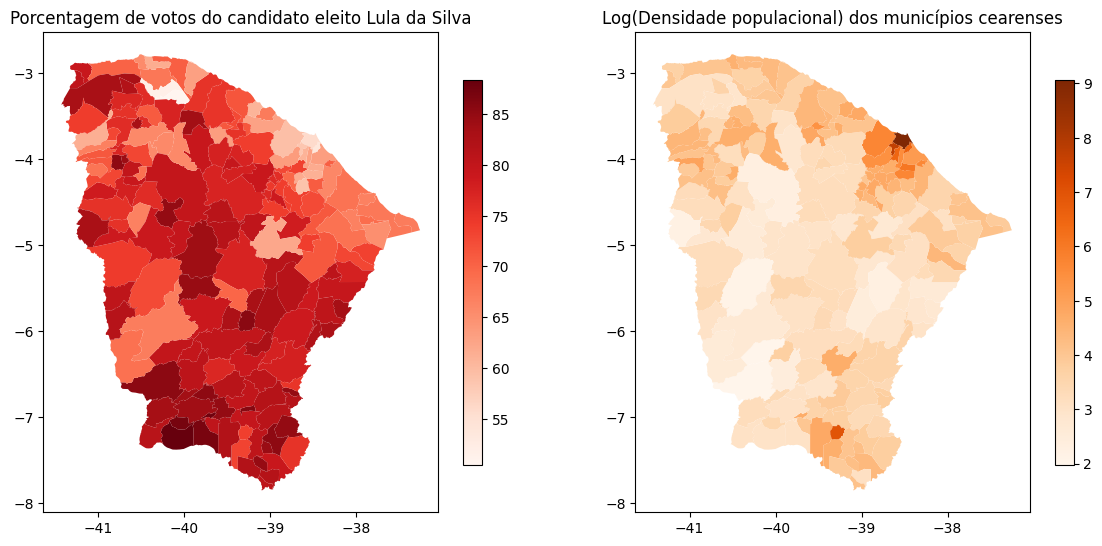

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend=True, cmap='Reds', legend_kwds={'shrink': 0.5}, ax=ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['densidade_populacional']), cmap='Oranges', legend=True, legend_kwds={'shrink': 0.5}, ax=ax[1])
ax2.set_title('Log(Densidade populacional) dos municípios cearenses')
plt.show()

### 3.6.2. Indíce de desenvolvimento humano municipal (IDHM)

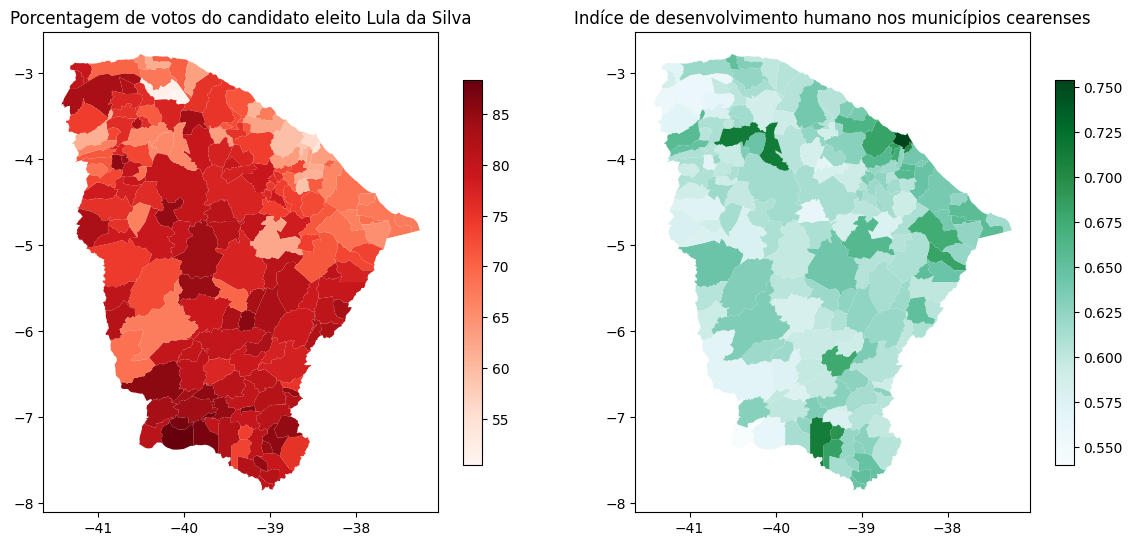

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend=True, cmap='Reds', legend_kwds={'shrink': 0.5}, ax=ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot('idhm', cmap='BuGn', legend=True, legend_kwds={'shrink': 0.5}, ax=ax[1])
ax2.set_title('Indíce de desenvolvimento humano nos municípios cearenses')
plt.show()

### 3.6.3. PIB *per capita*

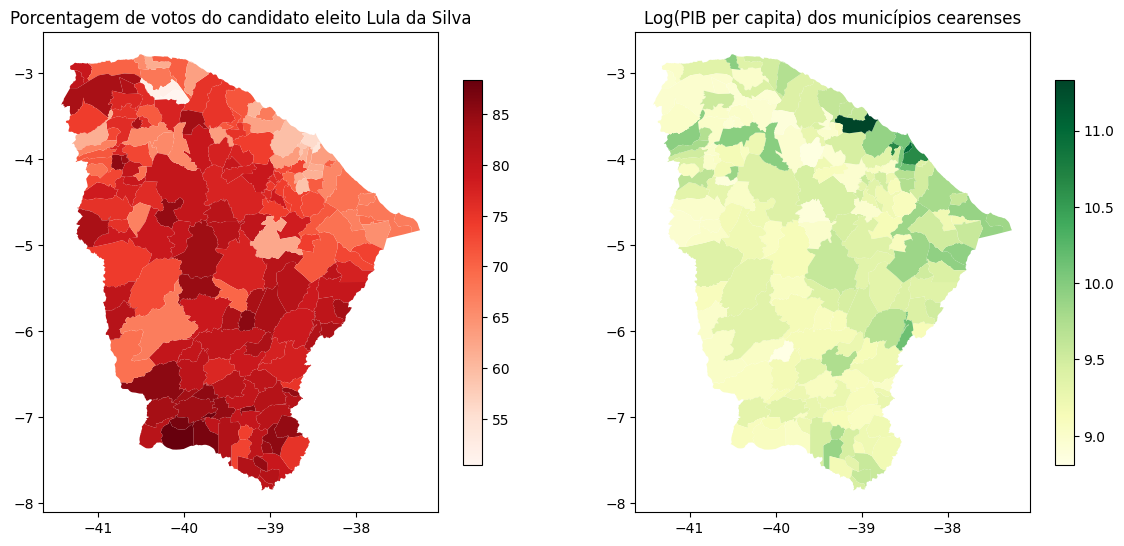

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend=True, cmap='Reds', legend_kwds={'shrink': 0.5}, ax=ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['pib_per_capita']), cmap='YlGn', legend=True, legend_kwds={'shrink': 0.5}, ax=ax[1])
ax2.set_title('Log(PIB per capita) dos municípios cearenses')
plt.show()

### 3.6.4. Área urbanizada

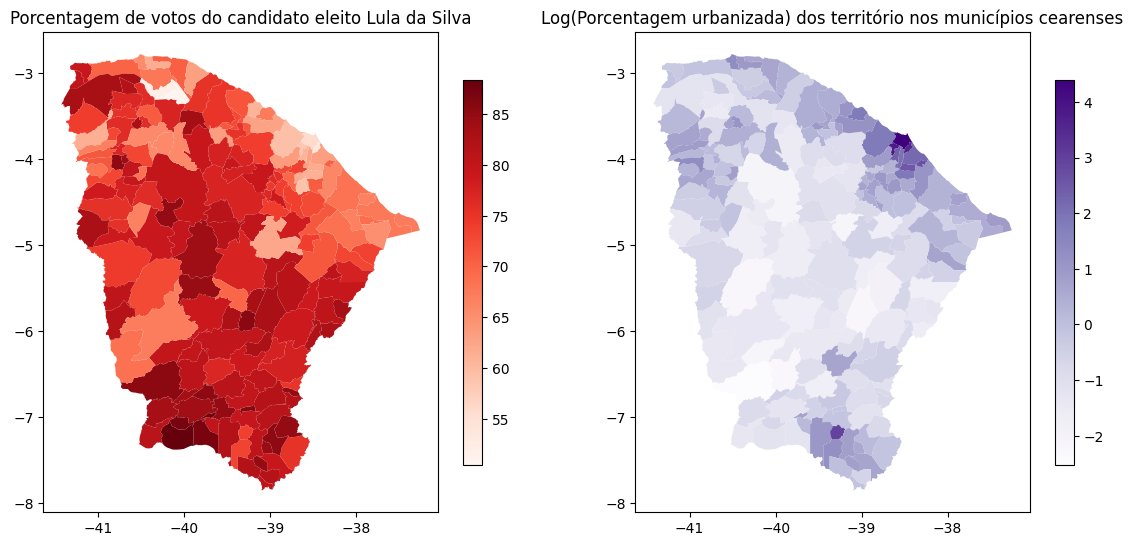

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(14, 10))

ax1 = votos_lula_por_municipio.plot('porcentagem_votos', legend=True, cmap='Reds', legend_kwds={'shrink': 0.5}, ax=ax[0])
ax1.set_title('Porcentagem de votos do candidato eleito Lula da Silva')
ax2 = dados_ibge.plot(np.log(dados_ibge['porcentagem_urbana']), cmap='Purples', legend=True, legend_kwds={'shrink': 0.5}, ax=ax[1])
ax2.set_title('Log(Porcentagem urbanizada) dos território nos municípios cearenses')
plt.show()

## 3.7. Análise por intervalo de indicadores socioeconômicos

Há a possibilidade de analisar os votos por grupos, intervalos dos indicadores socioeconômicos do IBGE. Instancia-se um *dataframe* com a quantidade de votos para cada candidato em cada município cearense.

In [47]:
# Os dados são agrupados por nome do município e candidato e os votos somados. Por último, os indíces são resetados:

votos_candidatos_por_municipio = presidente.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()
votos_candidatos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos
0,ABAIARA,JAIR MESSIAS BOLSONARO,725
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025
2,ABAIARA,VOTO BRANCO,63
3,ABAIARA,VOTO NULO,141
4,ACARAPE,JAIR MESSIAS BOLSONARO,3526


In [48]:
# Os dados socioeconômicos do IBGE são juntados ao dataframe dos votos:

votos_candidatos_por_municipio = pd.merge(
    left=votos_candidatos_por_municipio, right=dados_ibge,
    how='left', left_on='nm_municipio', right_on='name_muni'
)

# A coluna nome é retirada, pois os dados são redundantes:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.drop('name_muni', axis=1)
votos_candidatos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,JAIR MESSIAS BOLSONARO,725,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
2,ABAIARA,VOTO BRANCO,63,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
3,ABAIARA,VOTO NULO,141,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
4,ACARAPE,JAIR MESSIAS BOLSONARO,3526,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...",130.002,15140,0.606,10317.47,2.28,1.75,116.46


As funções abaixo serão utilizadas para ajustar os dados para análise:

In [49]:
def intervalos_ibge(dataframe: pd.DataFrame, nome_coluna: str, nova_coluna: str, bins: list, labels: list):
  """
  A função 'intervalos_ibge' adiciona ao dataframe com os votos dos candidatos por município uma nova coluna. Tal coluna passa a conter um intervalo
  pré-determinado determinado indicador do IBGE relacionado ao município em questão.

  dataframe: dataframe contendo os votos por candidato em cada município.
  nome_coluna: coluna com a informação que será utilizada para gerar o intervalo.
  nova_coluna: nome da nova coluna contendo os intervalos dos indicadores do IBGE.
  bins: lista com os valores que serão usados para formar os intervalos dos indicadores.
  labels: lista com as labels dos intervalos.
  """

  dataframe[nova_coluna] = pd.cut(
      dataframe[nome_coluna], bins=bins, labels=labels,
      include_lowest=True, right=False # o valor mais baixo é incluso, enquanto o valor maior não é incluso.
  )

  return dataframe # retorna o dataframe, agora contendo a coluna com os intervalos dos indicadores do IBGE.

def dict_votos_totais(dataframe: pd.DataFrame, coluna_indicador: str):
  """
  A função dict_votos_totais retorna um dicionário com a quantidade de votos gerais para cada intervalo dos indicadores do IBGE.

  dataframe: contendo os votos por candidato em cada município, além da coluna com os intervalos dos indicadores.
  coluna_indicador: nome da coluna contendo os intervalos dos indicadores.
  """

  valores_totais = dataframe.groupby(coluna_indicador)['qt_votos'].sum()
  valores_totais = dict(valores_totais)

  return valores_totais

def dataframe_com_porcentagens(dataframe: pd.DataFrame, dictionary: dict, coluna_indicador: str):
  """
  A função dataframe_com_porcentagens retorna um dataframe contendo a porcentagem de votos para cada candidato referente a cada intervalo de indicador.

  dataframe: dataframe com votos dos candidatos por municípios.
  dictionary: dicionário contendo os votos totais de cada intervalo de indicador do IBGE.
  coluna_indicador: coluna com o indicador do IBGE que se deseja calcular os valores de porcentagem.
  """

  # O dataframe é agrupado pela coluna com os indicadores e nome dos candidatos, os votos são somados e ordenados:

  dataframe_intervalos_ibge = dataframe.groupby([coluna_indicador, 'nm_votavel'])['qt_votos'].sum()\
                                       .reset_index().sort_values([coluna_indicador, 'qt_votos'], ascending=[True, False])

  # A porcentagem para cada candidado em cada intervalo do indicador é calculada:

  porcentagem = list()

  for index, row in dataframe_intervalos_ibge.iterrows():
    valor = round((row['qt_votos']/dictionary[row[coluna_indicador]]) * 100, 2)
    porcentagem.append(valor)

  # E depois uma nova coluna é adicionada ao dataframe que é retornado:

  dataframe_intervalos_ibge['porcentagem_' + coluna_indicador] = porcentagem # o nome da coluna é obtido a partir da concatenação das strings.

  return dataframe_intervalos_ibge

## 3.7. Análise por intervalo de indicadores socioeconômicos

Há a possibilidade de analisar os votos por grupos, intervalos dos indicadores socioeconômicos do IBGE. Instancia-se um *dataframe* com a quantidade de votos para cada candidato em cada município cearense.

In [50]:
# Os dados são agrupados por nome do município e candidato e os votos somados. Por último, os indíces são resetados:

votos_candidatos_por_municipio = presidente.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()
votos_candidatos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos
0,ABAIARA,JAIR MESSIAS BOLSONARO,725
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025
2,ABAIARA,VOTO BRANCO,63
3,ABAIARA,VOTO NULO,141
4,ACARAPE,JAIR MESSIAS BOLSONARO,3526


In [51]:
# Os dados socioeconômicos do IBGE são juntados ao dataframe dos votos:

votos_candidatos_por_municipio = pd.merge(
    left=votos_candidatos_por_municipio, right=dados_ibge,
    how='left', left_on='nm_municipio', right_on='name_muni'
)

# A coluna nome é retirada, pois os dados são redundantes:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.drop('name_muni', axis=1)
votos_candidatos_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,JAIR MESSIAS BOLSONARO,725,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
2,ABAIARA,VOTO BRANCO,63,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
3,ABAIARA,VOTO NULO,141,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17
4,ACARAPE,JAIR MESSIAS BOLSONARO,3526,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...",130.002,15140,0.606,10317.47,2.28,1.75,116.46


As funções abaixo serão utilizadas para ajustar os dados para análise:

In [52]:
def intervalos_ibge(dataframe: pd.DataFrame, nome_coluna: str, nova_coluna: str, bins: list, labels: list):
  """
  A função 'intervalos_ibge' adiciona ao dataframe com os votos dos candidatos por município uma nova coluna. Tal coluna passa a conter um intervalo
  pré-determinado determinado indicador do IBGE relacionado ao município em questão.

  dataframe: dataframe contendo os votos por candidato em cada município.
  nome_coluna: coluna com a informação que será utilizada para gerar o intervalo.
  nova_coluna: nome da nova coluna contendo os intervalos dos indicadores do IBGE.
  bins: lista com os valores que serão usados para formar os intervalos dos indicadores.
  labels: lista com as labels dos intervalos.
  """

  dataframe[nova_coluna] = pd.cut(
      dataframe[nome_coluna], bins=bins, labels=labels,
      include_lowest=True, right=False # o valor mais baixo é incluso, enquanto o valor maior não é incluso.
  )

  return dataframe # retorna o dataframe, agora contendo a coluna com os intervalos dos indicadores do IBGE.

def dict_votos_totais(dataframe: pd.DataFrame, coluna_indicador: str):
  """
  A função dict_votos_totais retorna um dicionário com a quantidade de votos gerais para cada intervalo dos indicadores do IBGE.

  dataframe: contendo os votos por candidato em cada município, além da coluna com os intervalos dos indicadores.
  coluna_indicador: nome da coluna contendo os intervalos dos indicadores.
  """

  valores_totais = dataframe.groupby(coluna_indicador)['qt_votos'].sum()
  valores_totais = dict(valores_totais)

  return valores_totais

def dataframe_com_porcentagens(dataframe: pd.DataFrame, dictionary: dict, coluna_indicador: str):
  """
  A função dataframe_com_porcentagens retorna um dataframe contendo a porcentagem de votos para cada candidato referente a cada intervalo de indicador.

  dataframe: dataframe com votos dos candidatos por municípios.
  dictionary: dicionário contendo os votos totais de cada intervalo de indicador do IBGE.
  coluna_indicador: coluna com o indicador do IBGE que se deseja calcular os valores de porcentagem.
  """

  # O dataframe é agrupado pela coluna com os indicadores e nome dos candidatos, os votos são somados e ordenados:

  dataframe_intervalos_ibge = dataframe.groupby([coluna_indicador, 'nm_votavel'])['qt_votos'].sum()\
                                       .reset_index().sort_values([coluna_indicador, 'qt_votos'], ascending=[True, False])

  # A porcentagem para cada candidado em cada intervalo do indicador é calculada:

  porcentagem = list()

  for index, row in dataframe_intervalos_ibge.iterrows():
    valor = round((row['qt_votos']/dictionary[row[coluna_indicador]]) * 100, 2)
    porcentagem.append(valor)

  # E depois uma nova coluna é adicionada ao dataframe que é retornado:

  dataframe_intervalos_ibge['porcentagem_' + coluna_indicador] = porcentagem # o nome da coluna é obtido a partir da concatenação das strings.

  return dataframe_intervalos_ibge

### 3.7.1. Intervalos populacionais

In [53]:
# Intervalos:

bins = [0, 100000, 500000, 3000000]

# Labels para os intervalos populacionais:

labels = ['Menos de 100 mil habitantes', '100 mil e menos de 500 mil habitantes', '500 mil habitantes ou mais']

In [54]:
# Uma nova coluna com os intervalos populacionais é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe=votos_candidatos_por_municipio,
    nome_coluna='populacao',
    nova_coluna='populacao_intervalos',
    bins=bins, labels=labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos
0,ABAIARA,JAIR MESSIAS BOLSONARO,725,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes


In [55]:
# Os votos totais para cada intervalo populacional são mostrados no dicionário:

votos_por_intervalo_populacional = dict_votos_totais(votos_candidatos_por_municipio, 'populacao_intervalos')
votos_por_intervalo_populacional

{'Menos de 100 mil habitantes': 3152219,
 '100 mil e menos de 500 mil habitantes': 922505,
 '500 mil habitantes ou mais': 1574674}

In [56]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_populacionais = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_populacional, 'populacao_intervalos'
)
votos_intervalos_populacionais.head()

,populacao_intervalos,nm_votavel,qt_votos,porcentagem_populacao_intervalos
1,Menos de 100 mil habitantes,LUIZ INÁCIO LULA DA SILVA,2305474,73.14
0,Menos de 100 mil habitantes,JAIR MESSIAS BOLSONARO,734428,23.30
3,Menos de 100 mil habitantes,VOTO NULO,76277,2.42
2,Menos de 100 mil habitantes,VOTO BRANCO,36040,1.14
5,100 mil e menos de 500 mil habitantes,LUIZ INÁCIO LULA DA SILVA,621858,67.41


In [57]:
fig = px.bar(
    data_frame=votos_intervalos_populacionais,
    y='populacao_intervalos',
    x='porcentagem_populacao_intervalos',
    color='nm_votavel',
    title='Porcentagem de votos dos candidatos por intervalo populacional dos municípios cearenses'
)
fig.update_layout(
    yaxis_title='', xaxis_title='Porcentagem dos votos', legend_title='Candidatos',
    yaxis= dict(autorange='reversed'), title=dict(x=0.5)
)
fig.show()

> * O percentual de votos em **branco e nulo praticamente não se altera nos diferentes estratos.**
> * O percentual de votos no candidato **Jair Messias Bolsonaro aumenta nos intervalos dos municípios com maior população.**
> * Apesar da proporção de votos no candidato eleito **Luiz Inácio Lula da Silva** nos estratos de maior população **diminuir**, ele manteve **mais de metade dos votos** em todos os intervalos.

### 3.7.2. Intervalos de indíce de desenvolvimento humano (IDHM)

In [58]:
# Intervalos:

bins = [0, 0.55, 0.7, 0.8]

# Labels para os intervalos de IDH municipal:

labels = ['IDH baixo', 'IDH médio', 'IDH alto']

In [59]:
# Uma nova coluna com os intervalos de IDHM é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe=votos_candidatos_por_municipio,
    nome_coluna='idhm',
    nova_coluna='idhm_intervalos',
    bins=bins, labels=labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos
0,ABAIARA,JAIR MESSIAS BOLSONARO,725,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio


In [60]:
# Os votos totais para cada intervalo de IDHM são mostrados no dicionário:

votos_por_intervalo_idhm = dict_votos_totais(votos_candidatos_por_municipio, 'idhm_intervalos')
votos_por_intervalo_idhm

{'IDH baixo': 11134, 'IDH médio': 3813913, 'IDH alto': 1824351}

In [61]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_idhm = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_idhm, 'idhm_intervalos'
)
votos_intervalos_idhm.head()

,idhm_intervalos,nm_votavel,qt_votos,porcentagem_idhm_intervalos
1,IDH baixo,LUIZ INÁCIO LULA DA SILVA,9034,81.14
0,IDH baixo,JAIR MESSIAS BOLSONARO,1744,15.66
3,IDH baixo,VOTO NULO,239,2.15
2,IDH baixo,VOTO BRANCO,117,1.05
5,IDH médio,LUIZ INÁCIO LULA DA SILVA,2746185,72.00


In [62]:
fig = px.bar(
    data_frame=votos_intervalos_idhm,
    y='idhm_intervalos',
    x='porcentagem_idhm_intervalos',
    color='nm_votavel',
    title='Porcentagem de votos dos candidatos por intervalo de IDH municipal dos municípios cearenses'
)
fig.update_layout(
    yaxis_title='', xaxis_title='Porcentagem dos votos', legend_title='Candidatos',
    yaxis=dict(autorange='reversed'), title=dict(x=0.5)
)
fig.show()

> * O intervalo IDH baixo é referente unicamente ao município de Salitre, o que pode ser visto abaixo:

In [63]:
votos_candidatos_por_municipio.query('idhm_intervalos == "IDH baixo"')['nm_municipio'].unique()

array(['SALITRE'], dtype=object)

> * O percentual de votos em **branco e nulo praticamente não se altera nos diferentes estratos.**
> * E nesse município, em específico, o candidato **Jair Bolsonaro teve um desempenho eleitoral baixo, acompanhado de grande percentual de votos do candidato eleito Lula da Silva.**
> * **Jair Bolsonaro obteve melhor desempenho** no grupo com os municípios de IDH alto. O **menor desempenho** de **Lula da Silva também ocorreu nesse grupo**, mas ainda com a maioria dos votos (57,70%).

### 3.7.3. Intervalos de PIB *per capita*

In [64]:
# Intervalos:

bins = [0, 10000, 20000, 90000]

# Labels para os intervalos de PIB per capita:

labels = ['Menos de R$ 10000', 'Entre R$ 10000 - 19999,99', 'R$ 20000 ou mais']

In [65]:
# Uma nova coluna com os intervalos de PIB per capita é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe=votos_candidatos_por_municipio,
    nome_coluna='pib_per_capita',
    nova_coluna='pib_intervalos',
    bins=bins, labels=labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos,pib_intervalos
0,ABAIARA,JAIR MESSIAS BOLSONARO,725,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000


In [66]:
# Os votos totais para cada intervalo de PIB per capita são mostrados no dicionário:

votos_por_intervalo_pib = dict_votos_totais(votos_candidatos_por_municipio, 'pib_intervalos')
votos_por_intervalo_pib

{'Menos de R$ 10000': 1130559,
 'Entre R$ 10000 - 19999,99': 2330108,
 'R$ 20000 ou mais': 2188731}

In [67]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_pib = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_pib, 'pib_intervalos'
)
votos_intervalos_pib.head()

,pib_intervalos,nm_votavel,qt_votos,porcentagem_pib_intervalos
1,Menos de R$ 10000,LUIZ INÁCIO LULA DA SILVA,876368,77.52
0,Menos de R$ 10000,JAIR MESSIAS BOLSONARO,214720,18.99
3,Menos de R$ 10000,VOTO NULO,27554,2.44
2,Menos de R$ 10000,VOTO BRANCO,11917,1.05
5,"Entre R$ 10000 - 19999,99",LUIZ INÁCIO LULA DA SILVA,1664479,71.43


In [68]:
fig = px.bar(
    data_frame=votos_intervalos_pib,
    y='pib_intervalos',
    x='porcentagem_pib_intervalos',
    color='nm_votavel',
    title='Porcentagem de votos dos candidatos por intervalo de PIB per capita dos municípios cearenses'
)
fig.update_layout(
    yaxis_title='', xaxis_title='Porcentagem dos votos', legend_title='Candidatos',
    yaxis=dict(autorange='reversed'), title=dict(x=0.5)
)
fig.show()

> * O percentual de votos em **branco e nulo praticamente não se altera nos diferentes estratos.**
> * O percentual de votos dos candidatos **Jair Bolsonaro cresce nos grupos de municípios com maior PIB *per capita*.**
* **A tendência inversa acontece com Lula da Silva**, apesar de ter em todos os grupos mais da metade dos votos.

### 3.7.4. Intervalos de território urbanizado

In [69]:
# Intervalos:

bins= [0, 10, 40, 90]

# Labels para os intervalos de território urbanizado:

labels= ['Menos de 10%', 'Entre 10 - 39,99%', '40% ou mais']

In [70]:
# Uma nova coluna com os intervalos de território urbanizado é adicionada ao dataframe:

votos_candidatos_por_municipio = intervalos_ibge(
    dataframe=votos_candidatos_por_municipio,
    nome_coluna='porcentagem_urbana',
    nova_coluna='urbana_intervalos',
    bins=bins, labels=labels
)
votos_candidatos_por_municipio.head(2)

,nm_municipio,nm_votavel,qt_votos,geometry,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional,populacao_intervalos,idhm_intervalos,pib_intervalos,urbana_intervalos
0,ABAIARA,JAIR MESSIAS BOLSONARO,725,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000,Menos de 10%
1,ABAIARA,LUIZ INÁCIO LULA DA SILVA,5025,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",180.833,11965,0.628,9158.04,3.19,1.76,66.17,Menos de 100 mil habitantes,IDH médio,Menos de R$ 10000,Menos de 10%


In [71]:
# Os votos totais para cada intervalo de território urbanizado são mostrados no dicionário:

votos_por_intervalo_urbana = dict_votos_totais(votos_candidatos_por_municipio, 'urbana_intervalos')
votos_por_intervalo_urbana

{'Menos de 10%': 3615548, 'Entre 10 - 39,99%': 309428, '40% ou mais': 1724422}

In [72]:
# As porcentagens dos votos para cada candidato em cada município são calculadas e mostradas abaixo:

votos_intervalos_urbana = dataframe_com_porcentagens(
    votos_candidatos_por_municipio, votos_por_intervalo_urbana, 'urbana_intervalos'
)
votos_intervalos_urbana.head()

,urbana_intervalos,nm_votavel,qt_votos,porcentagem_urbana_intervalos
1,Menos de 10%,LUIZ INÁCIO LULA DA SILVA,2632250,72.80
0,Menos de 10%,JAIR MESSIAS BOLSONARO,853473,23.61
3,Menos de 10%,VOTO NULO,87939,2.43
2,Menos de 10%,VOTO BRANCO,41886,1.16
5,"Entre 10 - 39,99%",LUIZ INÁCIO LULA DA SILVA,207494,67.06


In [73]:
fig = px.bar(
    data_frame=votos_intervalos_urbana,
    y='urbana_intervalos',
    x='porcentagem_urbana_intervalos',
    color='nm_votavel',
    title='Porcentagem de votos dos candidatos por intervalo de território urbanizado dos municípios cearenses'
)
fig.update_layout(
    yaxis_title='', xaxis_title='Porcentagem dos votos', legend_title='Candidatos',
    yaxis=dict(autorange='reversed'), title=dict(x=0.5)
)
fig.show()

> * O percentual de votos em **branco e nulo praticamente não se altera nos diferentes estratos.**
> * O percentual de votos de **Jair Bolsonaro** **cresce** nos grupos de cidades **mais urbanizadas.**
> * E a tendência é **inversa** para **Lula da Silv**a, mesmo assim ele mantém **mais de metade dos votos** no grupo mais urbanizado.